# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date
from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings('ignore')

# Importa os dados e mostra as primeiras linhas do dataset

In [2]:
df_total = pd.read_csv("cases-brazil-states.csv")
df_total.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100k_inhabitants,vaccinated_second,vaccinated_second_per_100k_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,0.00047,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,0.00047,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Separação dos dataframes

In [3]:
df = df_total[df_total['state'] != 'TOTAL'] # Limpa as informações que não especificam estado
df['date'] = pd.to_datetime(df_total['date']).dt.date # Força as datas para o formato datetime

In [4]:
df_sp = df[df['state'] == 'SP'] # Dados apenas do estado de São paulo

In [5]:
df_rs = df[df['state'] == 'RS'] # Dados apenas do estado do Rio Grande do Sul

Text(0, 0.5, 'Óbitos')

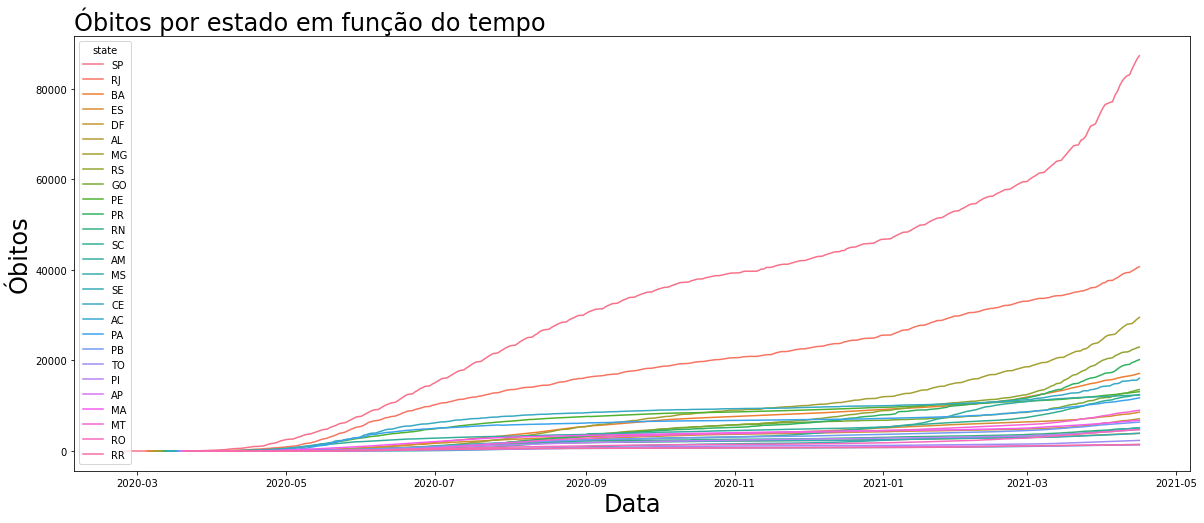

In [6]:
plt.figure(figsize=(20,8)) # cria uma figura 20x8
fig = sns.lineplot(x='date', y='deaths', hue='state', data=df) # plota óbitos em função do tempo
fig.set_title('Óbitos por estado em função do tempo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Óbitos', fontsize=24)

Text(0, 0.5, 'Óbitos')

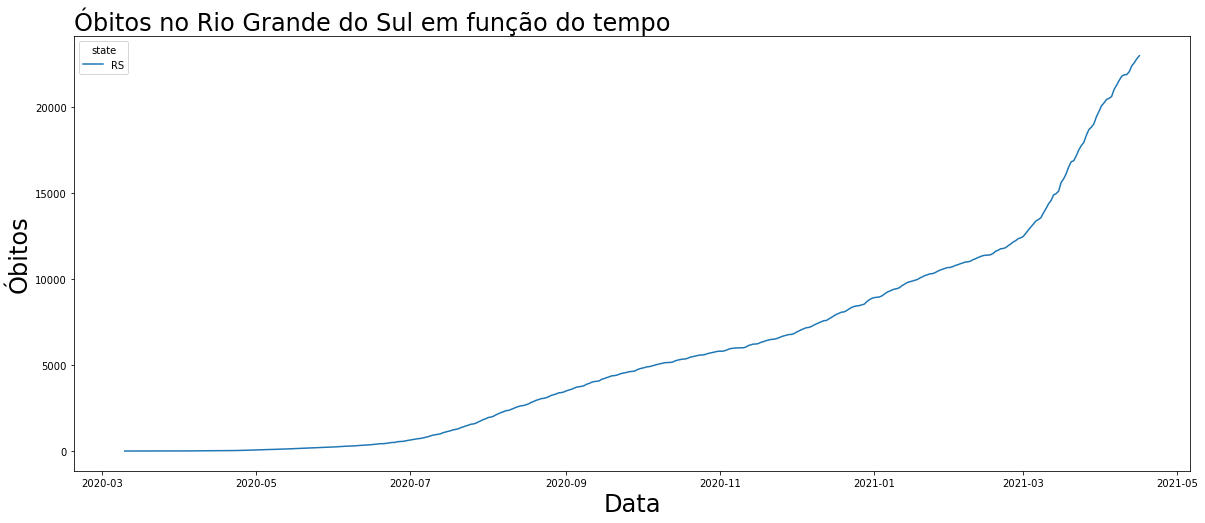

In [7]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='date', y='deaths', hue='state', data=df_rs) # plota óbitos em função do tempo
fig.set_title('Óbitos no Rio Grande do Sul em função do tempo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Óbitos', fontsize=24)

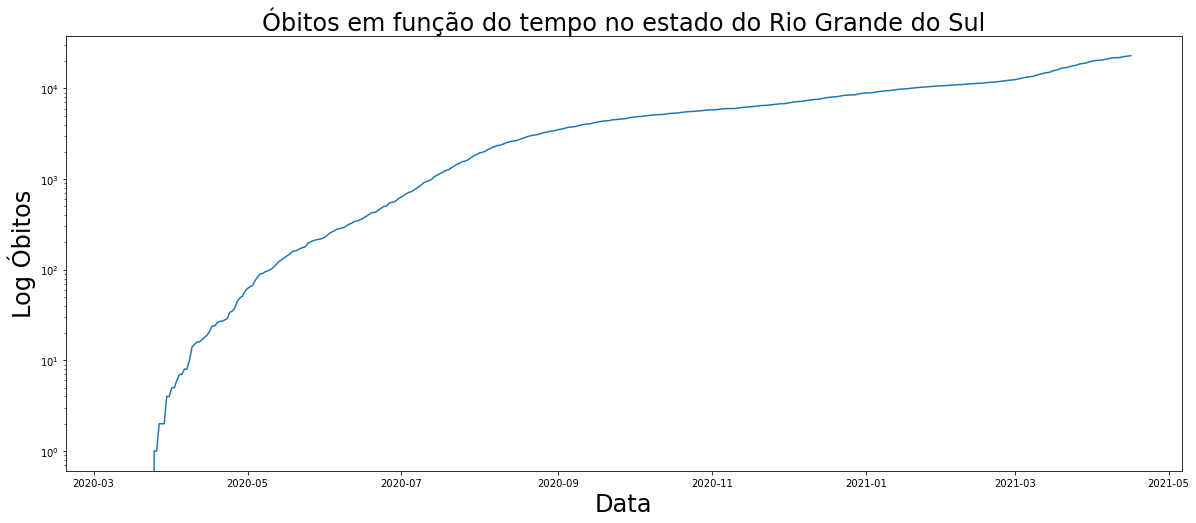

In [8]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x="date", y="deaths", data=df_rs)
fig.set_title("Óbitos em função do tempo no estado do Rio Grande do Sul", fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Log Óbitos', fontsize=24)
fig.set_yscale('log')

### Gráfico "monolog", onde só se aplica logaritmo a um dos eixos; aquele que se quer visualizar
### O gráfico acima mostra que a taxa de contaminação do vírus da COVID-19 ainda (17/04/2021) não parou de crescer no estado do Rio Grande do Sul;

# 

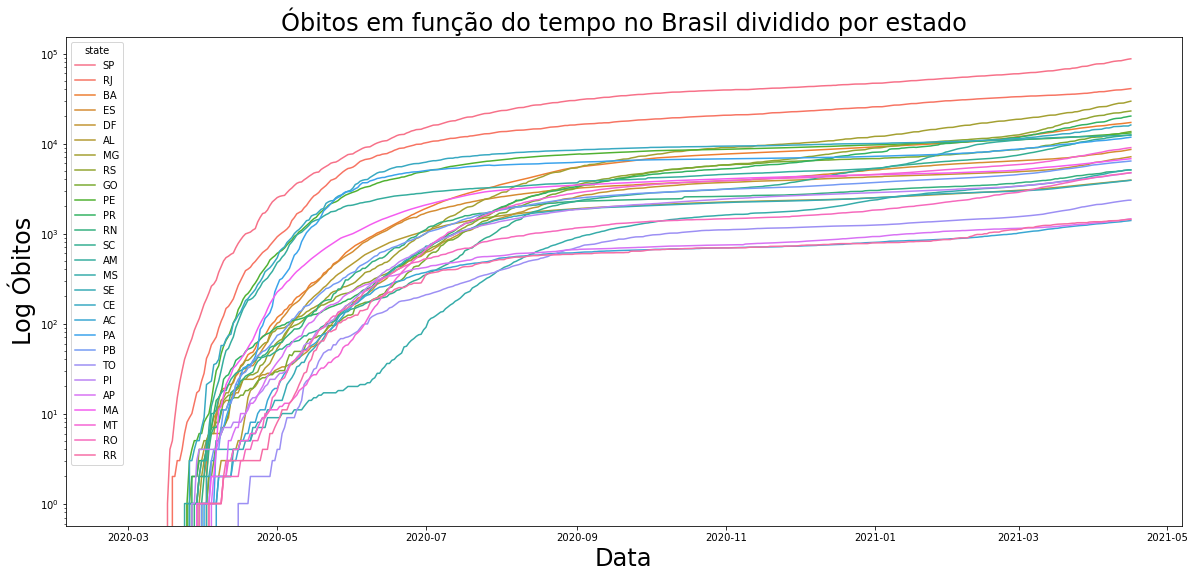

In [9]:
plt.figure(figsize=(20,9))
fig = sns.lineplot(x="date", y="deaths", data=df, hue='state')
fig.set_title("Óbitos em função do tempo no Brasil dividido por estado", fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Log Óbitos', fontsize=24)
fig.set_yscale('log')

In [10]:
df_sp.tail()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100k_inhabitants,vaccinated_second,vaccinated_second_per_100k_inhabitants
11099,115,2021-04-12,Brazil,SP,TOTAL,181,83098,5310,2648844,83098,...,5768.50797,0.03137,2269521.0,1091895.0,12035827.0,26210.96748,5588469.0,12170.26293,2335460.0,5086.03739
11127,115,2021-04-13,Brazil,SP,TOTAL,1282,84380,18397,2667241,84380,...,5808.57195,0.03164,2307994.0,1091895.0,12035827.0,26210.96748,5723602.0,12464.54821,2427112.0,5285.63211
11155,115,2021-04-14,Brazil,SP,TOTAL,1095,85475,18790,2686031,85475,...,5849.49179,0.03182,2325023.0,1088735.0,12035827.0,26210.96748,5846699.0,12732.62214,2510157.0,5466.48298
11183,115,2021-04-15,Brazil,SP,TOTAL,1060,86535,18067,2704098,86535,...,5888.83711,0.03200,2333565.0,1088735.0,12035827.0,26210.96748,5934871.0,12924.63831,2634078.0,5736.35138
11211,115,2021-04-16,Brazil,SP,TOTAL,791,87326,17979,2722077,87326,...,5927.99080,0.03208,2333565.0,1088735.0,12035827.0,26210.96748,6012103.0,13092.82995,2885982.0,6284.93417


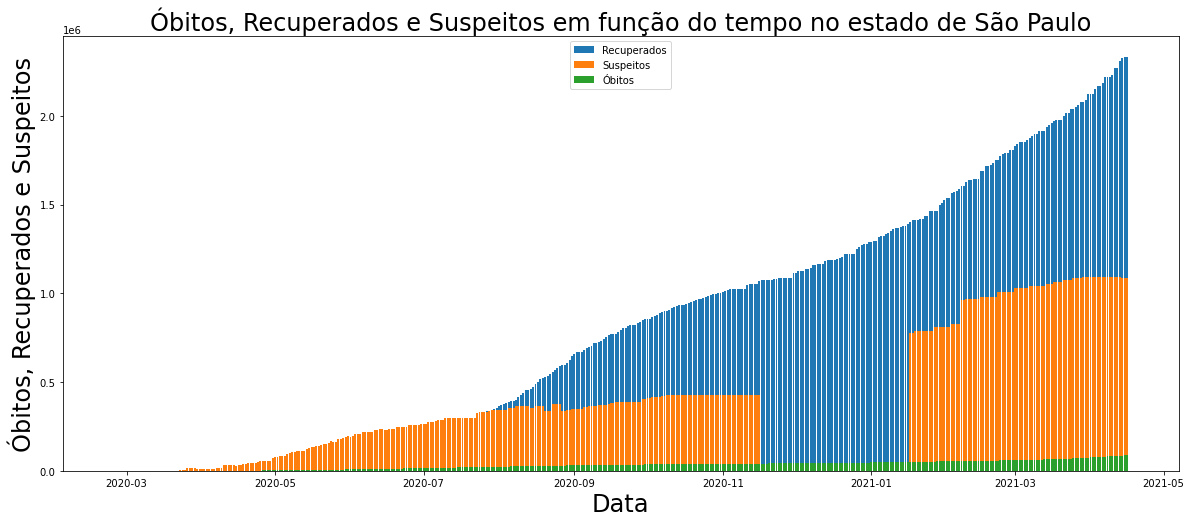

In [11]:
plt.figure(figsize=(20,8))

plt.bar(df_sp.date, df_sp.recovered, label='Recuperados')
fig=plt.bar(df_sp.date, df_sp.suspects, label='Suspeitos')
fig=plt.bar(df_sp.date, df_sp.deaths, label='Óbitos')
plt.title("Óbitos, Recuperados e Suspeitos em função do tempo no estado de São Paulo", fontsize=24)
plt.xlabel('Data', fontsize=24)
plt.ylabel('Óbitos, Recuperados e Suspeitos', fontsize=24)
plt.legend()

In [12]:
def plot_linha(titulo,xlabel,ylabel,x,y,dataset,hue):
    ax = sns.lineplot(x=x, y=y, hue=hue, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=20)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20, rotation=90)

In [13]:
def plot_barra(titulo,xlabel,ylabel,x,y,dataset):
    plt.figure(figsize=(20,6))
    ax = plt.bar(dataset[x], dataset[y])
    plt.title(titulo, loc='left', fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20, rotation=90)

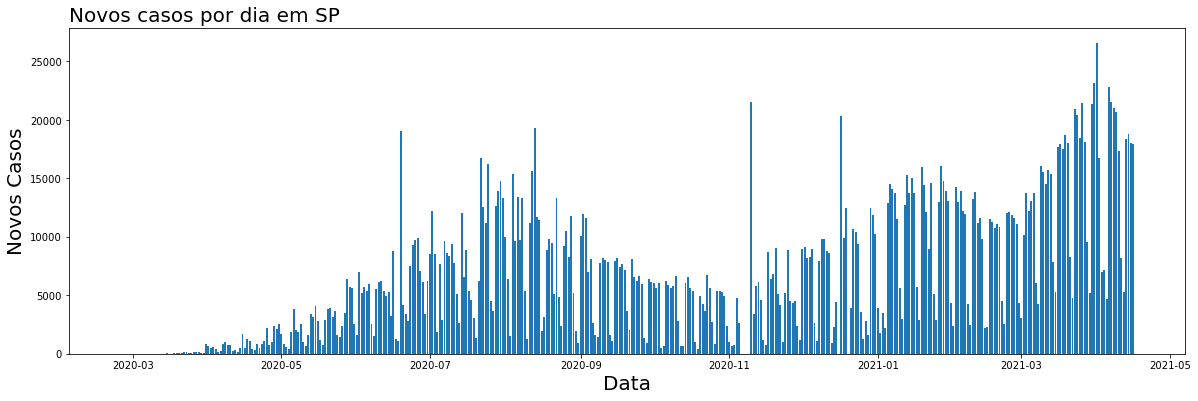

In [14]:
plot_barra("Novos casos por dia em SP", 'Data', 'Novos Casos', 'date', 'newCases', df_sp)

In [15]:
df_sp['casesAcceleration'] = df_sp['newCases'].diff()
df_sp['deathsAcceleration'] = df_sp['newDeaths'].diff()
df_sp['recoverAcceleration'] = df_sp['recovered'].diff()
df_sp.tail()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100k_inhabitants,vaccinated_second,vaccinated_second_per_100k_inhabitants,casesAcceleration,deathsAcceleration,recoverAcceleration
11099,115,2021-04-12,Brazil,SP,TOTAL,181,83098,5310,2648844,83098,...,1091895.0,12035827.0,26210.96748,5588469.0,12170.26293,2335460.0,5086.03739,-2846.0,-329.0,0.0
11127,115,2021-04-13,Brazil,SP,TOTAL,1282,84380,18397,2667241,84380,...,1091895.0,12035827.0,26210.96748,5723602.0,12464.54821,2427112.0,5285.63211,13087.0,1101.0,38473.0
11155,115,2021-04-14,Brazil,SP,TOTAL,1095,85475,18790,2686031,85475,...,1088735.0,12035827.0,26210.96748,5846699.0,12732.62214,2510157.0,5466.48298,393.0,-187.0,17029.0
11183,115,2021-04-15,Brazil,SP,TOTAL,1060,86535,18067,2704098,86535,...,1088735.0,12035827.0,26210.96748,5934871.0,12924.63831,2634078.0,5736.35138,-723.0,-35.0,8542.0
11211,115,2021-04-16,Brazil,SP,TOTAL,791,87326,17979,2722077,87326,...,1088735.0,12035827.0,26210.96748,6012103.0,13092.82995,2885982.0,6284.93417,-88.0,-269.0,0.0


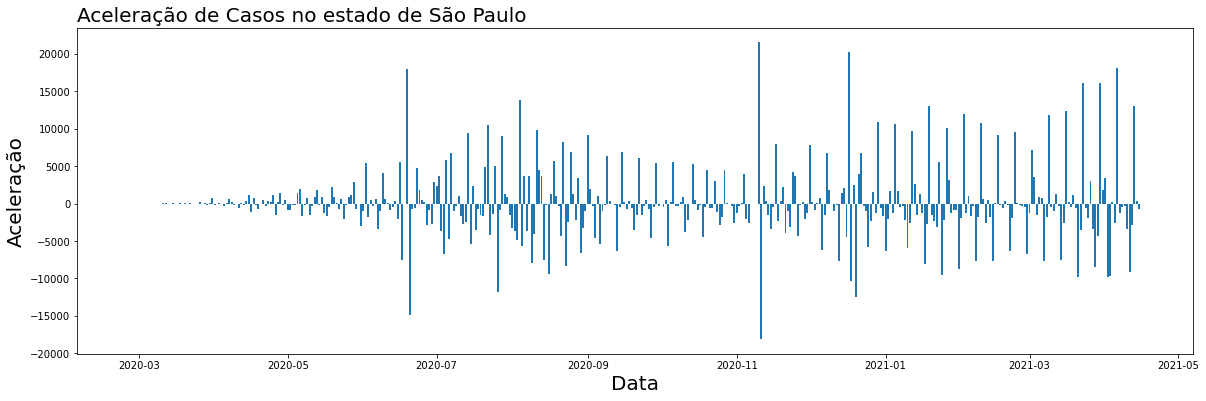

In [16]:
plot_barra('Aceleração de Casos no estado de São Paulo', 'Data', 'Aceleração', 'date', 'casesAcceleration', df_sp)

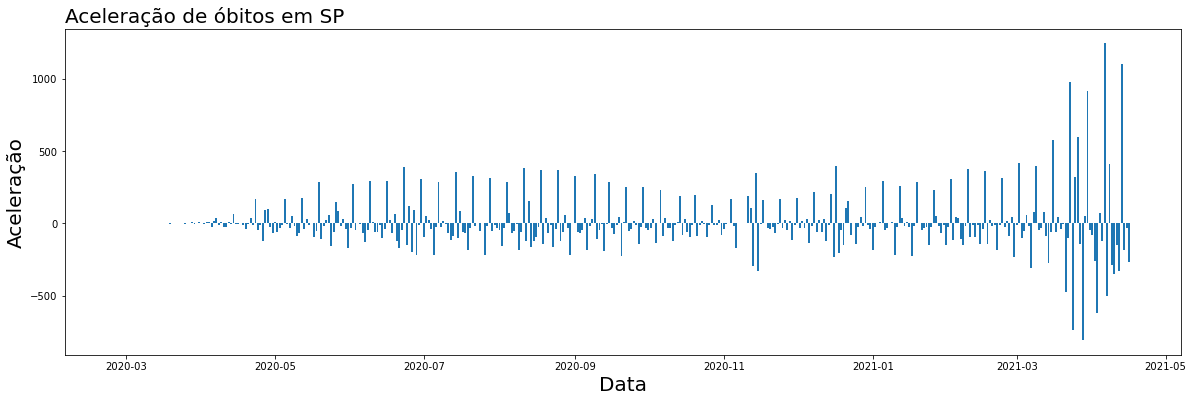

In [17]:
plot_barra('Aceleração de óbitos em SP','Data','Aceleração','date','deathsAcceleration', df_sp)

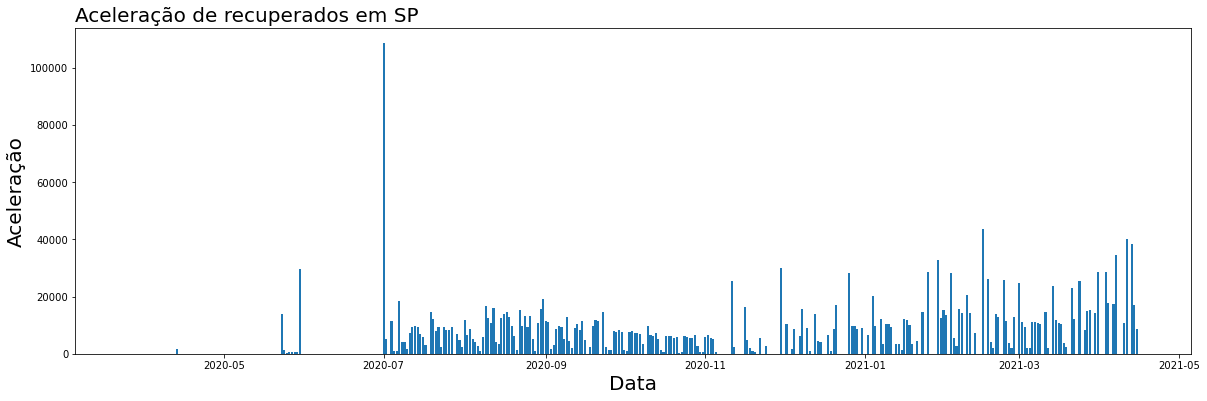

In [18]:
plot_barra('Aceleração de recuperados em SP','Data','Aceleração','date','recoverAcceleration', df_sp)

In [19]:
df_sp['deathsAvg'] = df_sp.newDeaths.rolling(window=7,center=False).mean() #média móvel semanal
df_sp['deathsAvg_14d'] = df_sp.newDeaths.rolling(window=14, center=False).mean() #média móvel 14 dias

<BarContainer object of 417 artists>

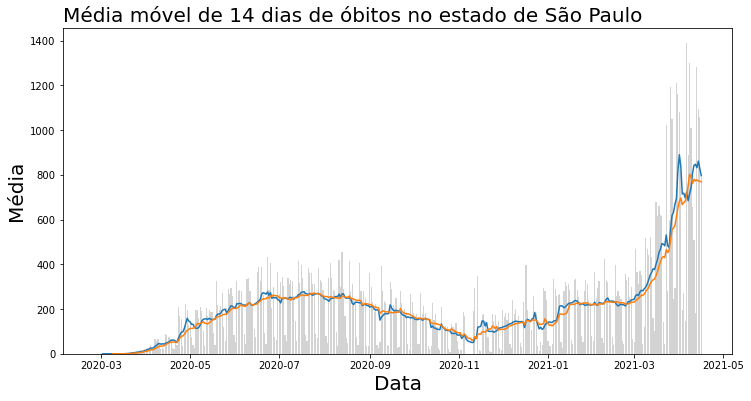

In [20]:
plot_linha("Média móvel semanal de óbitos no estado de São Paulo", 'Data', 'Média','date','deathsAvg', df_sp, None)
plot_linha("Média móvel de 14 dias de óbitos no estado de São Paulo", 'Data', 'Média','date','deathsAvg_14d', df_sp, None)
plt.bar(df_sp['date'],df_sp['newDeaths'],color='lightgrey')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

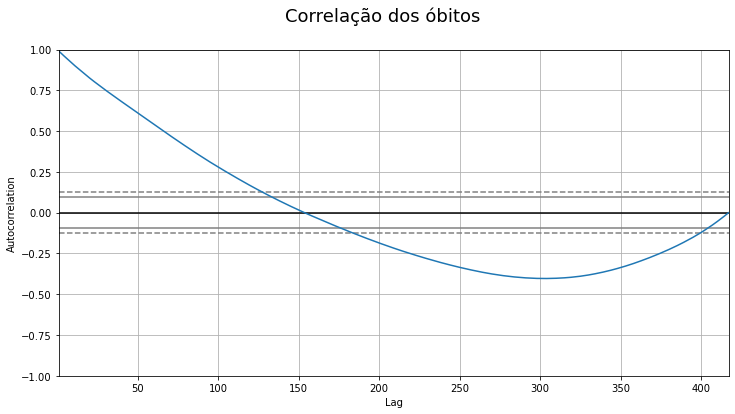

In [21]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos óbitos', fontsize=18,)
autocorrelation_plot(df_sp['deaths'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

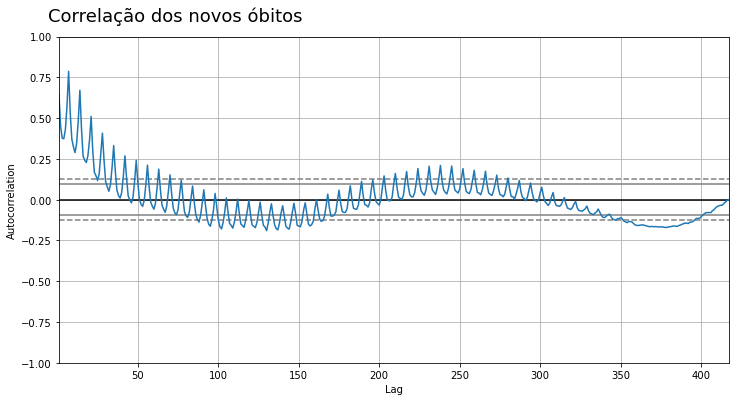

In [22]:
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação dos novos óbitos", fontsize=18, x=0.26,y=0.95)
autocorrelation_plot(df_sp['newDeaths'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

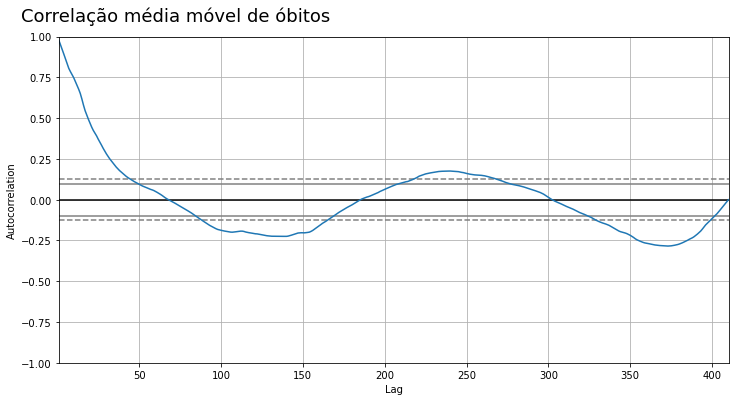

In [23]:
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação média móvel de óbitos", fontsize=18, x=0.26,y=0.95)
autocorrelation_plot(df_sp['deathsAvg'][7:])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

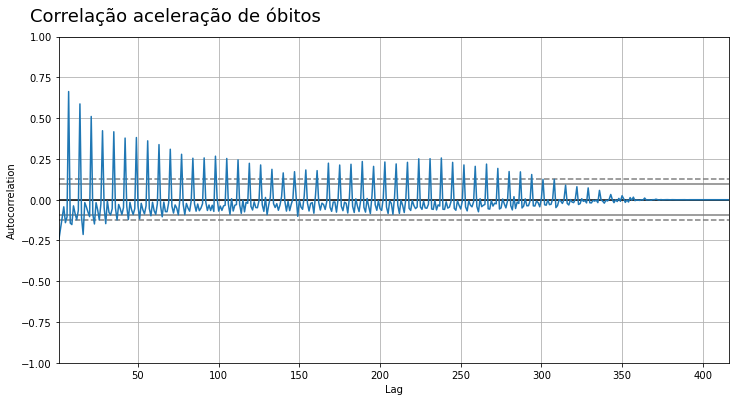

In [24]:
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação aceleração de óbitos", fontsize=18, x=0.26,y=0.95)
autocorrelation_plot(df_sp['deathsAcceleration'][1:])

In [25]:
df_sp['month'] = pd.to_datetime(df_sp['date'])
df_sp['dayOfWeek'] = df_sp['month'].dt.day_name()
df_sp.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,vaccinated_per_100k_inhabitants,vaccinated_second,vaccinated_second_per_100k_inhabitants,casesAcceleration,deathsAcceleration,recoverAcceleration,deathsAvg,deathsAvg_14d,month,dayOfWeek
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Tuesday
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,2020-02-26,Wednesday
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2020-02-27,Thursday
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,2020-02-28,Friday
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,2020-02-29,Saturday


In [26]:
dias = {'Monday': 'Segunda', 'Tuesday': 'Terça', 'Wednesday': 'Quarta', 'Thursday': 'Quinta', 'Friday': 'Sexta',
       'Saturday': 'Sábado', 'Sunday': 'Domingo'}

In [27]:
df_sp['dayOfWeek'] = df_sp['dayOfWeek'].map(dias)

In [28]:
df_sp.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,vaccinated_per_100k_inhabitants,vaccinated_second,vaccinated_second_per_100k_inhabitants,casesAcceleration,deathsAcceleration,recoverAcceleration,deathsAvg,deathsAvg_14d,month,dayOfWeek
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Terça
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,2020-02-26,Quarta
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2020-02-27,Quinta
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,2020-02-28,Sexta
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,2020-02-29,Sábado


In [29]:
agrupados_sp = df_sp.groupby('dayOfWeek')['deaths', 'newDeaths', 'deathsAcceleration'].mean().round()

In [30]:
agrupados_sp['dayOfWeek'] = agrupados_sp.index
agrupados_sp.head(7)

,deaths,newDeaths,deathsAcceleration,dayOfWeek
dayOfWeek,,,,
Domingo,31379.0,70.0,-142.0,Domingo
Quarta,31496.0,273.0,-47.0,Quarta
Quinta,31783.0,287.0,15.0,Quinta
Segunda,31427.0,48.0,-22.0,Segunda
Sexta,32034.0,251.0,-36.0,Sexta
Sábado,31309.0,212.0,-29.0,Sábado
Terça,31223.0,320.0,277.0,Terça


In [31]:
agrupados_sp = agrupados_sp.reindex(['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'])

In [32]:
agrupados_sp.head(7)

,deaths,newDeaths,deathsAcceleration,dayOfWeek
dayOfWeek,,,,
Domingo,31379.0,70.0,-142.0,Domingo
Segunda,31427.0,48.0,-22.0,Segunda
Terça,31223.0,320.0,277.0,Terça
Quarta,31496.0,273.0,-47.0,Quarta
Quinta,31783.0,287.0,15.0,Quinta
Sexta,32034.0,251.0,-36.0,Sexta
Sábado,31309.0,212.0,-29.0,Sábado


<AxesSubplot:xlabel='dayOfWeek', ylabel='newDeaths'>

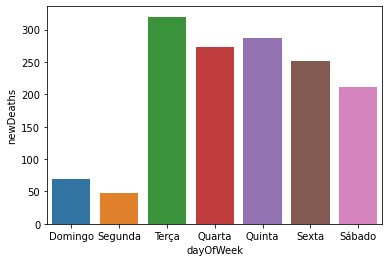

In [33]:
sns.barplot(agrupados_sp['dayOfWeek'], agrupados_sp['newDeaths'])

In [34]:
def criar_features(df, label=None):
    df = df.copy()
    df['diasemana'] = df['month'].dt.dayofweek
    df['mes'] = df['month'].dt.month
    df['diames'] = df['month'].dt.day
    df['semana'] = df['month'].dt.weekofyear
    
    X = df[['diasemana','mes','diames']]
    if label:
        y=df[label]
        return X, y
    return X

In [35]:
X, y = criar_features(df_sp,label='deaths')

In [36]:
df_final = pd.concat([X,y],axis=1)

In [37]:
df_final.head(10)

,diasemana,mes,diames,deaths
0,1,2,25,0
2,2,2,26,0
4,3,2,27,0
6,4,2,28,0
8,5,2,29,0
10,6,3,1,0
12,0,3,2,0
14,1,3,3,0
16,2,3,4,0
19,3,3,5,0


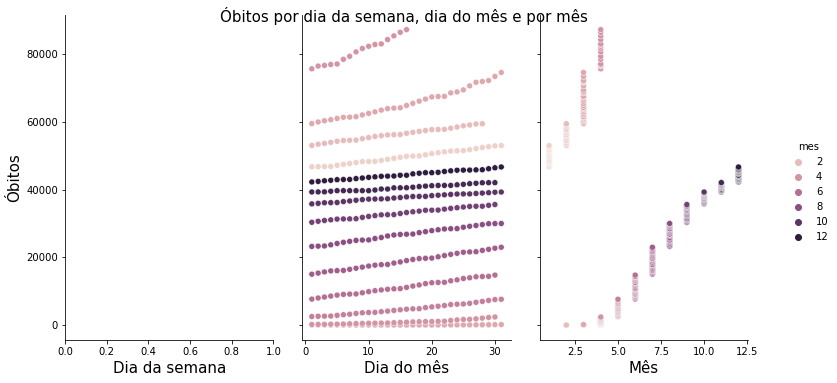

In [38]:
g = sns.pairplot(df_final.dropna(),
                hue='mes',
                x_vars=['diasemana','diames','mes'],
                y_vars=['deaths'])
g.fig.set_size_inches(12,6)
g.axes[0,0].set_xlabel('Dia da semana', fontsize=15)
g.axes[0,1].set_xlabel('Dia do mês', fontsize=15)
g.axes[0,2].set_xlabel('Mês', fontsize=15)
g.axes[0,0].set_ylabel('Óbitos', fontsize=15)

plt.suptitle('Óbitos por dia da semana, dia do mês e por mês', va='top', ha='center', fontsize=15)
plt.show()

Text(0.5, 0.98, 'Óbitos por semana')

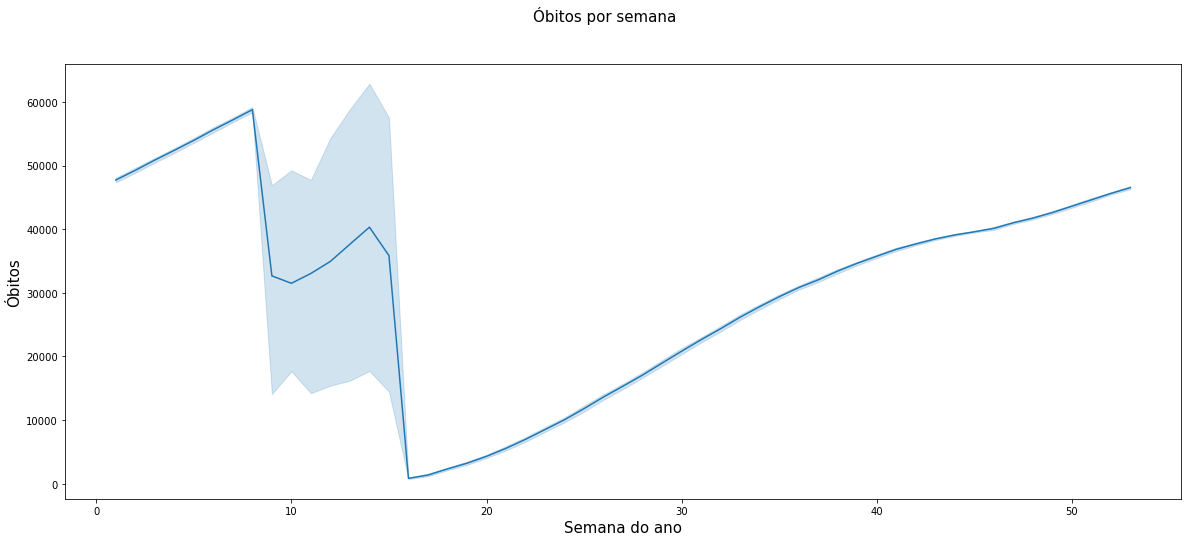

In [39]:
def criar_features(df,label=None):
    df = df.copy()
    df['diasemana'] = df['month'].dt.dayofweek
    df['mês'] = df['month'].dt.month
    df['diamês'] = df['month'].dt.day
    df['semana'] = df['month'].dt.weekofyear

    X = df[['diasemana','mês','diamês','semana']]

    if label:
        y = df[label]
        return X,y
    return X

X, y = criar_features(df_sp,label='deaths')
df_final2 = pd.concat([X,y],axis=1)

plt.figure(figsize=(20,8))
g = sns.lineplot(x='semana',y='deaths',data=df_final2)

g.axes.set_xlabel('Semana do ano',fontsize=15)
g.axes.set_ylabel('Óbitos',fontsize=15)

plt.suptitle('Óbitos por semana',fontsize=15)